# RougeL vs. EM

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


with open('../work/paradise_lost/finetuned/Llama-3.2-3B_summary.json', 'r') as f:
    data = json.load(f)

logs = data.get('sample_logs', [])

rouge_scores = [l["ROUGE-L Score"] for l in logs]
em_scores = [l["Exact Match Score"] for l in logs]
x_vals = list(range(len(rouge_scores)))

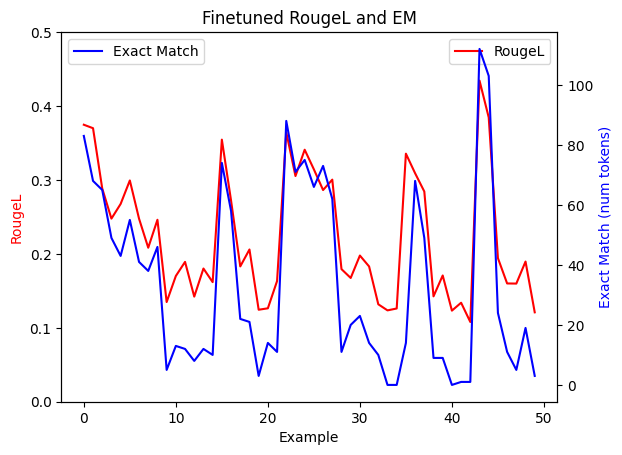

In [3]:
ax1 = sns.lineplot(x=x_vals, y=rouge_scores, label="RougeL", color="red")
ax2 = ax1.twinx()
sns.lineplot(x=x_vals, y=em_scores, label="Exact Match", color="blue", ax=ax2)
ax1.set_ylim(0,0.5)
ax1.set_ylabel('RougeL', color="red")
ax2.set_ylabel('Exact Match (num tokens)', color="blue")
plt.title("Finetuned RougeL and EM")
ax1.set_xlabel("Example")
plt.show()

In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


with open('../work/paradise_lost/baseline/Llama-3.2-3B_summary.json', 'r') as f:
    data = json.load(f)

logs = data.get('sample_logs', [])

rouge_scores = [l["ROUGE-L Score"] for l in logs]
em_scores = [l["Exact Match Score"] for l in logs]
x_vals = list(range(len(rouge_scores)))

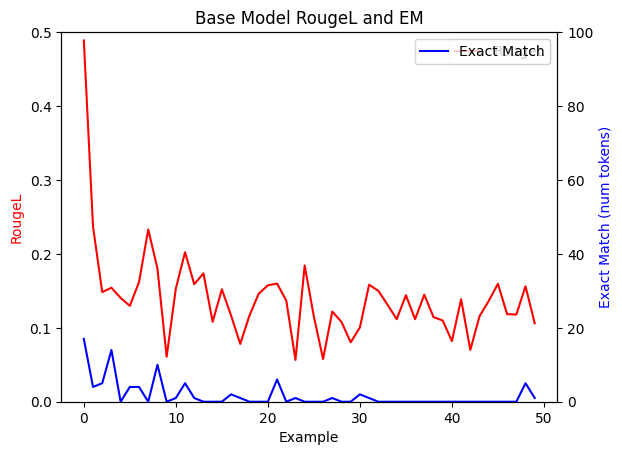

In [6]:
ax1 = sns.lineplot(x=x_vals, y=rouge_scores, label="RougeL", color="red")
ax2 = ax1.twinx()
sns.lineplot(x=x_vals, y=em_scores, label="Exact Match", color="blue", ax=ax2)
ax1.set_ylabel('RougeL', color="red")
ax1.set_ylim(0,0.5)
ax2.set_ylabel('Exact Match (num tokens)', color="blue")
ax2.set_ylim(0,100)
ax1.set_xlabel("Example")
plt.title("Base Model RougeL and EM")
plt.show()

# Where do generations come from?

In [8]:
import ast
with open('../work/paradise_lost/baseline/Llama-3.2-3B_characterization.json', 'r') as f:
    data = f.readlines()


positions=ast.literal_eval(data[0])


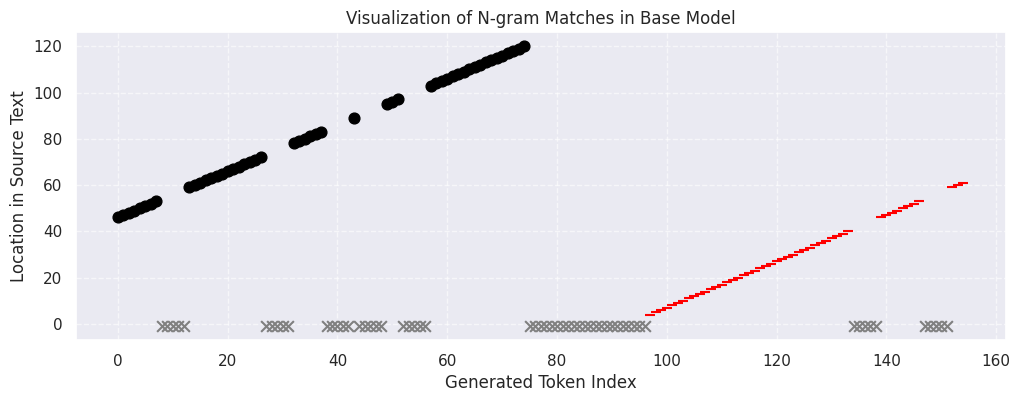

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


sns.set_theme(context='notebook')

# Flatten positions list (turns [[70]] -> 70, keeps -1)
flat_positions = [p[0] if isinstance(p, list) else -1 for p in positions]

# X-axis: Token index in the generated sequence
token_indices = np.arange(len(flat_positions))

# Track max index seen so far (to detect jumps back)
max_seen = -1
colors = []
markers = []

for i, pos in enumerate(flat_positions):
    if pos == -1:
        colors.append("gray")  # Missed token (X)
        markers.append("x")
    elif pos >= max_seen:
        colors.append("black")  # Normal progression (•)
        markers.append("o")
        max_seen = pos  # Update max seen index
    else:
        colors.append("red")  # Backtracking event (—)
        markers.append("_")

# Plot
plt.figure(figsize=(12, 4))
for i, (x, y, c, m) in enumerate(zip(token_indices, flat_positions, colors, markers)):
    plt.scatter(x, y, color=c, marker=m, s=60)

plt.xlabel("Generated Token Index")
plt.ylabel("Location in Source Text")
plt.title("Visualization of N-gram Matches in Base Model")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Finetuned

In [10]:
import ast
with open('../work/paradise_lost/finetuned/Llama-3.2-3B_characterization.json', 'r') as f:
    data = f.readlines()


positions=ast.literal_eval(data[0])


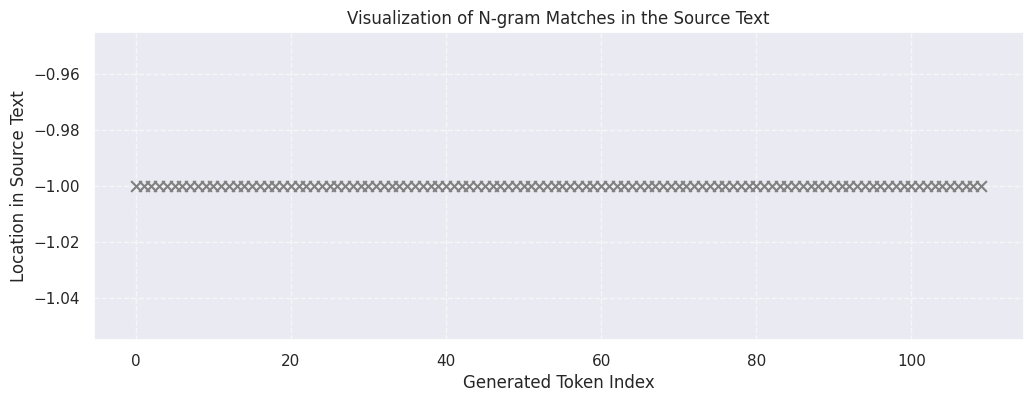

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


sns.set_theme(context='notebook')

# Flatten positions list (turns [[70]] -> 70, keeps -1)
flat_positions = [p[0] if isinstance(p, list) else -1 for p in positions]

# X-axis: Token index in the generated sequence
token_indices = np.arange(len(flat_positions))

# Track max index seen so far (to detect jumps back)
max_seen = -1
colors = []
markers = []

for i, pos in enumerate(flat_positions):
    if pos == -1:
        colors.append("gray")  # Missed token (X)
        markers.append("x")
    elif pos >= max_seen:
        colors.append("black")  # Normal progression (•)
        markers.append("o")
        max_seen = pos  # Update max seen index
    else:
        colors.append("red")  # Backtracking event (—)
        markers.append("_")

# Plot
plt.figure(figsize=(12, 4))
for i, (x, y, c, m) in enumerate(zip(token_indices, flat_positions, colors, markers)):
    plt.scatter(x, y, color=c, marker=m, s=60)

plt.xlabel("Generated Token Index")
plt.ylabel("Location in Source Text")
plt.title("Visualization of N-gram Matches in the Source Text")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
